<h1> Estadística Descriptiva I</h1>

El objetivo principal de la Estadística es <strong> aprender de los datos </strong>. Es decir, en Estadística tratamos de entender lo que nos dicen los datos. La Estadística es una ciencia dedicada a <strong> poner los números en contexto y obtener conclusiones a partir de ello</strong>. 


Para poder hacer esto de forma exitosa se requiere una metodología adecuada para <strong> adquirir, presentar y analizar los datos</strong>. Presentar los datos de forma adecuada es el objetivo de la Estadística Descriptiva.

Si nos interesa un problema concreto (que puede ser de naturaleza social, física, mercantil, lo que sea), debemos ser capaces de tomar medidas del fenómeno a estudiar y guardarlas de forma adecuada. Habrá muchas medidas distintas que podremos analizar y aunque midan la misma cosa, tomarán valores diversos. 

Llamamos <strong> Población </strong> a la totalidad de cosas y/o sujetos sobre los cuales se van a tomar medidas (o dicho de otro modo, de los cuales vamos a tomar información) para nuestro análisis estadístico. 

Llamamos <strong> Muestra </strong> al subconjunto de la población que hemos seleccionado para obtener nuestros datos. 

<span style="color: blue"><strong>Ejemplo.- </strong> podemos elegir una nuestra de 10 alumnos entre los 100 de una clase para estudiar cosas como la altura, el peso, la nota de Cálculo del año pasado, etc. La población es la clase al completo, la muestra son los alumnos elegidos, los datos o medidas tomadas son la altura, el peso, la nota obtenida en Cálculo. </span>

<h2>Datos en Python.-  Pandas, numpy, scipy, matplotlib y seaborn</h2>

En nuestras clases de teoría y de prácticas vamos a utilizar Python y, muy particularmente, Jupyter Notebook para realizar los cálculos que necesitemos. 

Para trabajar con datos, Python utiliza un paquete llamado Pandas (de Panel Data).

Pandas se instala de forma sencilla y en Jupyter se carga utilizando la siguiente orden: 

In [58]:
import pandas as pd

Con la ayuda de este paquete se pueden leer ficheros de datos de distintos tipos, que luego pueden manipularse de forma sencilla.

Una vez cargados los datos con Pandas, vamos a usar los siguientes paquetes para trabajar con dichos datos:

In [59]:
import numpy as np
import scipy as sp

# Para crear visualizaciones estáticas, animadas e interactivas.
import matplotlib.pyplot as plt

# Para crear gráficos estadísticos atractivos e informativos.
import seaborn as sns

Dentro de Pandas se pueden construir 
- <strong>listas</strong> (o arrays de dimensión 1)
- <strong>dataframes</strong> (bases de datos especiales, en las que se toma el mismo número de medidas a un conjunto finito de variables, de modo que los datos se pueden guardar en forma de tabla, en una matriz) 

Esto puede hacerse de forma <strong>manual</strong> o <strong>leyendo ficheros</strong>

In [60]:
# Creación de un array
a1 =np.array([14.75,18.5,72.9,35.7])
s1 =pd.Series(a1)
s1

0    14.75
1    18.50
2    72.90
3    35.70
dtype: float64

In [61]:
# Creación de un dataframe
names =['GreaterLondon','Tokyo','Paris','New York']
population =[8663300,9272565,2229621, 8491079]
area =[1572,627,105,784]
df =pd.DataFrame({'cities':names,'population': population,'area': area})

Veamos ahora algunas órdenes de Pandas para examinar un dataframe

In [62]:
df

,cities,population,area
0,GreaterLondon,8663300,1572
1,Tokyo,9272565,627
2,Paris,2229621,105
3,New York,8491079,784


Si solo queremos ver las dos primeras filas del dataframe usamos la orden:

In [63]:
df.head(2)

,cities,population,area
0,GreaterLondon,8663300,1572
1,Tokyo,9272565,627


Mientras que si queremos ver las dos últimas filas, usaríamos:

In [64]:
df.tail(2)

,cities,population,area
2,Paris,2229621,105
3,New York,8491079,784


Con la orden siguiente, podemos saber cuál es el tamaño del dataframe:

In [65]:
df.shape

(4, 3)

Esto significa que tenemos 4 filas y 3 columnas. 

Es decir, <strong> estamos midiendo 3 variables distintas (ciudad, población y área) y cada una de estas variables se ha medido 4 veces </strong> (hemos apuntado 4 ciudades de las que hemos tomado se población y su área).

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cities      4 non-null      object
 1   population  4 non-null      int64 
 2   area        4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes


Podemos añadir una nueva columna a nuestro dataframe de forma sencilla. 

Por ejemplo, podemos añadir el dato de la densidad poblacional dividiendo la población observada por el área observada. Para hacer la operación anterior necesitamos varios pasos:

- Vamos a extraer tanto la población como el área como arrays separados a partir del dataframe df. Para acceder a una array dentro de un dataframe se escribe el nombre del dataframe y entre corchetes el nombre del array
- Luego operaremos con estos arrays para construir el nuevo (al que llamamos) densidad_poblacion
- Lo añadimos al dataframe

In [67]:
poblacion = df['population']
area = df['area']
densidad_poblacion = poblacion/area
df['densidad_poblacion'] = densidad_poblacion
df

,cities,population,area,densidad_poblacion
0,GreaterLondon,8663300,1572,5511.005089
1,Tokyo,9272565,627,14788.779904
2,Paris,2229621,105,21234.485714
3,New York,8491079,784,10830.457908


También podemos hacerlo en una única línea de código

In [68]:
df['densidad_poblacion'] = df['population']/df['area']
df

,cities,population,area,densidad_poblacion
0,GreaterLondon,8663300,1572,5511.005089
1,Tokyo,9272565,627,14788.779904
2,Paris,2229621,105,21234.485714
3,New York,8491079,784,10830.457908


Aunque aún no hemos introducido los estadísticos comunes, vale la pena observar que existe una orden en Pandas existe la orden <strong>describe()</strong> que nos devuelve una descripción sencilla de las propiedades estadísticas de la población (media, desviación típica, cuartiles, etc.):

In [69]:
df.describe()

,population,area,densidad_poblacion
count,4.000000e+00,4.000000,4.000000
mean,7.164141e+06,772.000000,13091.182154
std,3.306720e+06,607.195191,6627.347118
min,2.229621e+06,105.000000,5511.005089
25%,6.925714e+06,496.500000,9500.594703
50%,8.577190e+06,705.500000,12809.618906
75%,8.815616e+06,981.000000,16400.206357
max,9.272565e+06,1572.000000,21234.485714


Además de construir dataframes "a mano" (tecleando las entradas), también podemos <strong> descargarlos de un fichero </strong> que contenga los datos. Pandas permite acceder a dataframes almacenados en distintos formatos. A lo largo del curso usaremos dataframes en formato csv.

In [70]:
cars=pd.read_csv('cars.csv')
cars

,Car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


Una vez cargado, podemos usar las órdenes ya vistas para averiguar su tamaño:

In [71]:
cars.shape

(32, 12)

También podemos extraer los datos de forma análoga a como hicimos antes con dat:

In [72]:
cars['hp']

0     110
1     110
2      93
3     110
4     175
5     105
6     245
7      62
8      95
9     123
10    123
11    180
12    180
13    180
14    205
15    215
16    230
17     66
18     52
19     65
20     97
21    150
22    150
23    245
24    175
25     66
26     91
27    113
28    264
29    175
30    335
31    109
Name: hp, dtype: int64

Si el fichero que vayamos a leer (o descargar) está en la misma carpeta en la que tengamos nuestro fichero Jupyter basta con indicar el nombre del fichero. En otro caso necesitaremos indicar también la ruta del directorio en que se encuentra. En otro caso, el programa no encontrará el fichero y dará error.

A veces un data frame no tiene valores en todas las observaciones. 

En Pandas hay dos órdenes, <strong> isnull() y isna()</strong> que permite comprobar si los datos contienen este tipo de fallos.

En las dos celdas siguientes calculamos el número de valores nulos o no asignados en nuestro dataframe. Para ello usaremos la orden <strong> sum() </strong> que calcula la suma de los elementos de un array que cumple una determinada condición. 

In [73]:
# finding null values
cars.isnull().sum()

Car     0
mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

In [74]:
cars.isna().sum()

Car     0
mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

En nuestro caso, no contiene estos errores: todos los sujetos tienen observaciones en todas las variables observadas.

A continuación vamos a ver cómo clasificar datos por categorías.

Imagina que queremos <strong>clasificar</strong>  los vehículos como ''flojos'', ''intermedios'', y ''potentes'' en funcion de los caballos de vapor (hp). Para ello, podríamos <strong>agrupar los datos por categorías</strong>, diciendo que un vehículo es ''flojo'' si hp es inferior a 90, potente si hp supera 150 e intermedio en el resto de casos. 

Para 'cortar'datos en categorías disponemos del comando <strong>cut(datos, bins, labels)</strong> en el que se indica:

- datos son los datos a cortar
- bins es una lista de marcas que indican cómo vamos a cortar los datos
- labels son los nombres de las categorías obtenidas

Veamos cómo se aplica en nuestro ejemplo:

In [75]:
Potencia=cars['hp']
Categoria=pd.cut(
    Potencia,
    bins = [0,90,150,500],
    labels=["Flojo", "Intermedio", "Potente"],
)
Categoria

0     Intermedio
1     Intermedio
2     Intermedio
3     Intermedio
4        Potente
5     Intermedio
6        Potente
7          Flojo
8     Intermedio
9     Intermedio
10    Intermedio
11       Potente
12       Potente
13       Potente
14       Potente
15       Potente
16       Potente
17         Flojo
18         Flojo
19         Flojo
20    Intermedio
21    Intermedio
22    Intermedio
23       Potente
24       Potente
25         Flojo
26    Intermedio
27    Intermedio
28       Potente
29       Potente
30       Potente
31    Intermedio
Name: hp, dtype: category
Categories (3, object): [Flojo < Intermedio < Potente]

Ahora podemos añadir la nueva variable "Categoría" al data frame:

In [76]:
cars['Categoria']=Categoria
cars

,Car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,Categoria
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Intermedio
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Intermedio
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Intermedio
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Intermedio
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Potente
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,Intermedio
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,Potente
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,Flojo
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,Intermedio
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,Intermedio


<h1> Variables estadísticas </h1>

Cuando decidimos estudiar una característica concreta de una población, realizamos la medición de esta característica en los elementos seleccionados para construir una muestra (por ejemplo, medimos la altura de los sujetos de la muestra). 

Ese valor define lo que llamaremos una <strong> variable estadística</strong>. Es variable porque cambia de un sujeto a otro y es estadística porque proviene de tomar datos de los miembros de una población.

Las variables estadísticas pueden ser <strong>cuantitativas</strong> o <strong>cualitativas</strong> en función de que se expresen o no numéricamente. 

Además, una variable cuantitativa puede ser <strong>discreta</strong> o <strong>continua</strong>. Será discreta si solo puede tomar valores de un subconjunto discreto de la recta real, será continua si puede tomar valores arbitrarios en un intervalo de la recta real)

<span style="color:blue">Ejemplo:</span>

<span style="color:blue">- La altura es una variable cuantitativa continua
    
<span style="color:blue">- El número de cursos que ha repetido un alumno al final de la ESO es una variable cuantitativa discreta
    
<span style="color:blue">- El género es una variable cualitativa
    
<span style="color:blue">- El color del pelo de una persona es una variable cualitativa


<h2> Medidas centrales (o de tendencia central)</h2>

A menudo necesitamos concentrar la información que tenemos de una población o de una muestra en un solo número (o <strong>agregado</strong>) que resuma dicha información. 

Cuando hacemos esto y el número calculado informa acerca de a qué se parecen los datos decimos que hemos concretado la información en una <strong>medida central</strong> (o, también, una <strong>medida de tendencia central</strong>). Las medidas centrales más usuales son:

* <strong>Media</strong> (aritmética)
$$\overline{X}=\frac{1}{n}\left(x_1+x_2+\cdots+x_n\right)=\frac{1}{n}\sum_{i=1}^nx_i$$
* <strong>Moda</strong>: Es el valor más frecuente en la población.
* <strong>Mediana</strong>: Es el valor que deja a la mitad de la población por debajo suyo y la otra mitad por encima. Si los datos están ordenados de menor a mayor, de modo que $x_1\leq x_2\leq \cdots x_n$, entonces la mediana vale
$$M_e=\left\{\begin{array}[cc] xx_{(n+1)/2} & \text{ si } n \text{ impar}\\ (x_{n/2}+x_{n/2+1})/2 & \text{ si } n \text{ par}\end{array}\right.$$
* <strong>Media</strong> (geométrica)
$$\overline{X}_g=\left(x_1\cdot x_2 \cdot x_3 \cdots x_{n-1}\cdot x_n\right)^{\frac{1}{n}}=\left(\prod_{i=1}^nx_i\right)^{\frac{1}{n}}$$
* <strong>Media</strong> (armónica)
$$\overline{X}_h= \frac{n}{\sum_{i=1}^n\frac{1}{x_i}}=n\left(\sum_{i=1}^nx_i^{-1}\right)^{-1}$$





<h2> Medidas de dispersión</h2>

Además de las medidas centrales, existen las llamadas <strong>medidas de dispersión</strong>, que nos informan sobre la calidad de alguna medida central. 

* La <strong>varianza</strong> y la <strong>desviación típica</strong> miden cómo de fiable es la media. Concretamente, si estamos trabajando con toda la población, usamos la varianza y la media poblacional:
$$\sigma^2=\frac{1}{n}\sum_{i=1}^n(x_i-\mu)^2; \quad \sigma=\sqrt{\sigma^2},$$
donde $\mu$ representa la media poblacional. 
Ahora bien, si estamos trabajando solo con una muestra, la varianza muestral y la desviación típica muestral se definen como:
$$s^2=\frac{1}{n-1}\sum_{i=1}^n(x_i-\overline{X})^2; \quad s=\sqrt{s^2}.$$

* <strong>Mínimo, máximo y rango</strong> Un primer paso para calcular donde se sitúan los datos es calcular sus valores mínimo y máximo, que denotaremos por m y M. Una vez calculados, el rango donde se encuentran los valores es el intervalo [m,M] 
* <strong>Cuantiles</strong>: Dado un valor $p\in [0,1]$, el cuantil-$p$ es el valor de la población que deja el $100p\%$ de la población por debajo suyo y el $100(1-p)\%$ por encima suyo. Por ejemplo, la mediana es el cuantil-$1/2$. También se llaman <strong>percentiles</strong> 
* Los <strong>cuartiles</strong> son los percentiles asociados a $p_1=0.25$ (lo llamamos $Q_1$),$p_2=0.5$ (lo llamamos $Q_2$ y coincide con la mediana), y $p_3=0.75$ (lo llamamos $Q_3$).


<h3>Propiedades de la varianza y la desviación típica:</h3>

Recordemos que miden lo lejos que están situados los datos respecto la media. Esto representa la dispersión de los datos si la media representa el centro.

- Si se le suma una constante a una variable, la varianza de la nueva variable no cambia.

- Si se multiplica una variable por una constante, la varianza de la nueva variable es igual a la de la antigua multiplicada por la constante al cuadrado.

- La desviación típica, al igual que la media, se expresa en las mismas unidades que los datos.

- La varianza se expresa en las unidades al cuadrado.

<strong>Cuartiles, rango intercuartílico y datos atípicos</strong>

Nótese que cuanto más alejados están los cuartiles $\{Q1,Q3\}$, más dispersos están los datos. Se llama el <strong>rango intercuartil (o intercuartílico)</strong> RIC la diferencia entre $Q_3$ y $Q_1$: $$\text{RIC}=Q_3-Q_1$$   

Se llaman <strong>atípicos</strong> los datos que son menores que $Q_1-1.5\text{RIC}$ , o mayores que $Q_3+1.5\text{RIC}$. Son valores que se consideran excesivamente grandes o excesivamente pequeños y a menudo se requiere eliminarlos de las observaciones para evitar sesgos.  

El resto de valores se llaman <strong>típicos</strong>.


<h2>Calcular medidas centrales con Python

Una vez hemos cargados los datos con Pandas, podemos usar numpy y scipy para calcular las medidas centrales que queramos. 


<span style="color:blue">Ejemplo.- Vamos a generar un array de datos y hallar su media aritmética de dos formas: usando la orden mean de numpy o calculándo la media directamente con su fórmula)

In [77]:
dat =np.array([1,2,2,2,2,4,5,6,7,8,3,3,3,3,7,9])
m1 = np.mean(dat)
m2 = sum(dat)/16
[m1,m2]

[4.1875, 4.1875]

Para la media geométrica podemos calcular usando la orden gmean() de scipy.stats o podemos hacer un pequeño programa:

In [78]:
g1 = sp.stats.gmean(dat)

In [79]:
def g_mean(x):
    prod=1
    for val in x:
        prod=prod*val
    return prod**(1/len(x))

In [80]:
g2 = g_mean(dat)

In [81]:
[g1,g2]

[3.5172818946594946, 3.517281894659494]

Para la media armónica podemos hacerlo usando la orden hmean() de scipy.stats o con un programa (el programa solo funcionará si todos los datos son números diferentes de 0): 

In [82]:
h1 = sp.stats.hmean(dat)

In [83]:
def h_mean(x):
    sum=0
    for val in x:
        sum=sum+1/val
    return len(x)/sum

In [84]:
h2 = h_mean(dat)

In [85]:
[h1,h2]

[2.9240699107984627, 2.924069910798463]

La moda puede calcularse con la orden mode() de scipy.stats:

In [86]:
sp.stats.mode(dat)

ModeResult(mode=array([2]), count=array([4]))

Obsérvese que la respuesta nos informa de que la moda es 2 y que esta observación aparece 4 veces en la población dat

La orden mode() puede usarse de dos formas ligeramente distintas.

Vamos a verlo con un segundo ejemplo. Vamos a calcular la moda del consumo de petroleo (mpg: millas por galón) en la población cars que habíamos descargado antes. Para ello, primero seleccionamos los datos de consumo de petróleo del dataframe:

In [87]:
consumo=cars['mpg']
consumo

0     21.0
1     21.0
2     22.8
3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
17    32.4
18    30.4
19    33.9
20    21.5
21    15.5
22    15.2
23    13.3
24    19.2
25    27.3
26    26.0
27    30.4
28    15.8
29    19.7
30    15.0
31    21.4
Name: mpg, dtype: float64

A continuación, le hallamos la moda:

In [88]:
consumo.mode()

0    10.4
1    15.2
2    19.2
3    21.0
4    21.4
5    22.8
6    30.4
dtype: float64

Esto significa que hay seis observaciones con máxima frecuencia (la población es, por tanto, multimodal: hay varios valores que sirven igualmente como moda).

También podemos hacer lo siguiente:

In [89]:
sp.stats.mode(consumo)

ModeResult(mode=array([10.4]), count=array([2]))

Obsérvese que al hacerlo de este modo, la respuesta consiste en mostrar uno de los posibles valores de la moda (ya que hay varios) y la frecuencia absoluta con la que aparece (en este caso, 2). 

De hecho, toma el primer valor de la lista que aparecía cuando se usaba la otra forma de obtener la moda. 

<h2>Calcular medidas de dispersión con Python

In [90]:
consumo.var()
sd=(consumo.var())**0.5
sd

6.026948052089105

<h2> Histogramas y diagramas de caja-bigotes</h2>

Veamos cómo dibujar histogramas y boxplots (diagramas de caja-bigotes) de los datos de un data frame.

* El diagrama de caja-bigotes es un Diagrama (o dibujo) que incluye la mediana, los cuartiles y datos atípicos de la variable observada. Es de gran utilidad a la hora de estudiar la dispersión de los datos.

* El diagrama de barras resulta muy útil con pocos datos y repetidos. El de sectores, con variables cuantitativas. Los diagramas de caja nos dan una visión rápida de los datos. Cuando los datos son numéricos, muchos, próximos y diferentes, se agrupan en intervalos de clase y gráficamente se utilizan los histogramas.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19bb8f90>]],
      dtype=object)

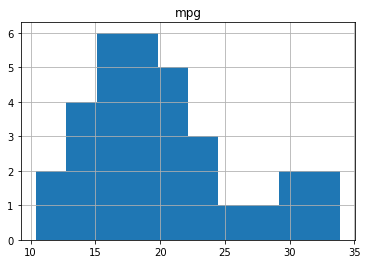

In [91]:
cars.hist(column='mpg')

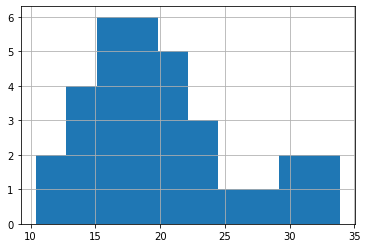

In [92]:
consumo.hist()

In [93]:
np.histogram(cars['mpg'], bins=10, range=None, density=False, weights=None)

(array([2, 4, 6, 6, 5, 3, 1, 1, 2, 2]),
 array([10.4 , 12.75, 15.1 , 17.45, 19.8 , 22.15, 24.5 , 26.85, 29.2 ,
        31.55, 33.9 ]))

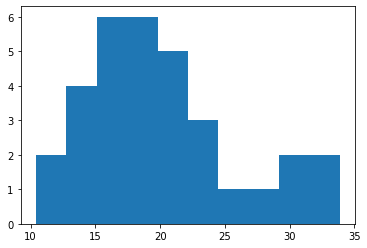

In [94]:
plt.hist(cars['mpg'], bins=10, range=None, density=False, weights=None)
plt.show()

In [95]:
np.histogram(cars['mpg'], bins=10, range=None, density=True, weights=None)

(array([0.02659574, 0.05319149, 0.07978723, 0.07978723, 0.06648936,
        0.03989362, 0.01329787, 0.01329787, 0.02659574, 0.02659574]),
 array([10.4 , 12.75, 15.1 , 17.45, 19.8 , 22.15, 24.5 , 26.85, 29.2 ,
        31.55, 33.9 ]))

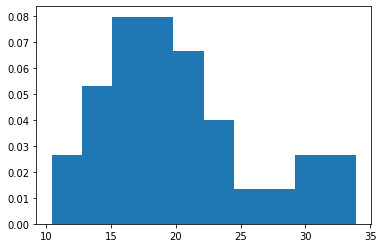

In [96]:
plt.hist(cars['mpg'], bins=10, density=True)
plt.show()

In [97]:
np.histogram(cars['mpg'], bins=[10,12,14,16,18,20,22,24,26,28,30,32,34], range=None, density=None, weights=None)

(array([2, 1, 7, 3, 5, 5, 2, 1, 2, 0, 2, 2]),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34]))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19ecda50>]],
      dtype=object)

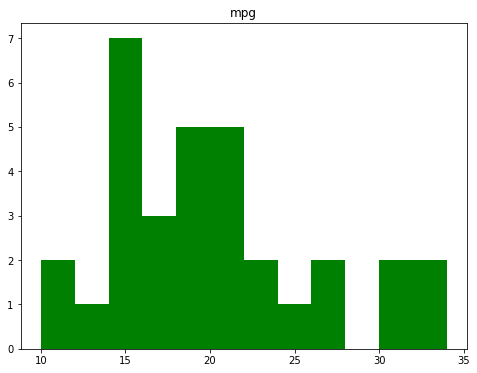

In [98]:
cars.hist(column='mpg',bins=[10,12,14,16,18,20,22,24,26,28,30,32,34], grid=False, figsize=(8,6), color='green',zorder=2,rwidth=1)

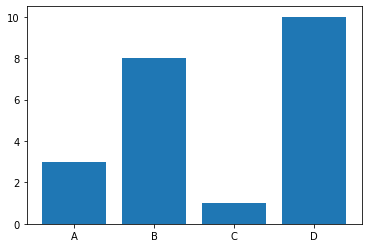

In [99]:
x = np.array(["A", "B", "C", "D"])
y = np.array([3, 8, 1, 10])

plt.bar(x,y)
plt.show()

En los histogramas, el eje de las abcisas (el horizontal) viene definido por los intervalos de clase. El eje de ordenadas (el vertical) puede venir definido por:
*  Frecuencias absolutas.
* Porcentajes (frecuencias relativas por 100).
* Alturas: Altura = (frecuencia absoluta)/(amplitud del intervalo de clase) si los intervalos son de distinta amplitud.
* Densidades: Densidad = (frecuencia relativa)/(amplitud del intervalo de clase) si los intervalos son de distinta amplitud.
Los histogramas pueden ser:
* Simétricos : Hay un intervalo central respecto el cual, los datos se reparten igual a derecha e izquierda.
* Sesgados: No son simétricos. Los hay sesgados a la derecha o a la izquierda. Hablaremos de cola a la derecha y a la izquierda.
* Unimodales: Si hay un máximo claro. Es decir, la moda sobresale.
* Bimodales:  Si hay dos modas. 

La dispersión de los datos también se ve reflejada en los histogramas. Cuanto más
puntiagudos son los histogramas, menos dispersos son los datos.
 



Nótese que cuanto más alejados están los cuartiles $\{Q1,Q3\}$, más dispersos están los datos. Se llama el <strong>rango intercuartil (o intercuartílico)</strong> RIC la diferencia entre $Q_3$ y $Q_1$: $$\text{RIC}=Q_3-Q_1$$   

Se llaman <strong>atípicos</strong> los datos que son menores que $Q_1-1.5\text{RIC}$ , o mayores que $Q_3+1.5\text{RIC}$. Son valores que se consideran excesivamente grandes o excesivamente pequeños y a menudo se requiere eliminarlos de las observaciones para evitar sesgos.  El resto de valores se llaman <strong>típicos</strong>.


Calculemos ahora los cuantiles como la mediana, los cuartiles, o los deciles:

Para la mediana hay una orden específica:

In [100]:
np.median(consumo)

19.2

Aunque podríamos usar que la mediana es el cuantil 0.5:

In [101]:
np.quantile(consumo,0.5)

19.2

Los cuartiles son:

In [102]:
Q1=np.quantile(consumo,0.25)
Q2=np.quantile(consumo,0.5)
Q3=np.quantile(consumo,0.75)
[Q1,Q2,Q3]

[15.425, 19.2, 22.8]

Llamamos <strong>rango intercuartílico</strong> al valor $$R=Q_3-Q_1.$$ Decimos que un valor observado es <strong>típico</strong> si queda dentro del intervalo $$[O_1,O_2]=[Q_1-1.5R,Q3+1.5R]$$ y que es un valor <strong>atípico</strong> si queda fuera de dicho rango. 

In [103]:
R=Q3-Q1
R

7.375

In [104]:
[o1,o2]=[Q1-1.5*R,Q3+1.5*R]
[o1,o2]   # La "o" viene de "outlier", que es la forma inglesa de "valor atípico"

[4.362500000000001, 33.8625]

In [105]:
consumo_atipicos = cars[(cars['mpg'] >= o2) | (cars['mpg'] <= o1)]
consumo_atipicos

,Car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,Categoria
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.9,1,1,4,1,Flojo


In [106]:
consumo_tipicos = cars[(cars['mpg'] >= o1) & (cars['mpg'] <= o2)]
consumo_tipicos

,Car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,Categoria
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Intermedio
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Intermedio
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Intermedio
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Intermedio
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Potente
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,Intermedio
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,Potente
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,Flojo
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,Intermedio
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,Intermedio


Ahora podemos dibujar el <strong>diagrama de caja-bigotes (o boxplot)</strong> de la variable "consumo":

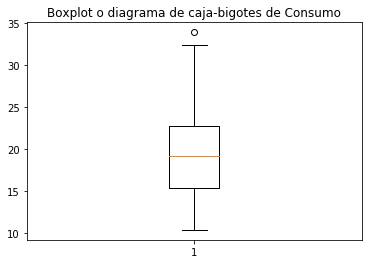

In [107]:
plt.boxplot(consumo) 
plt.title('Boxplot o diagrama de caja-bigotes de Consumo') 
plt.show()

Los deciles son: 

In [108]:
deciles=np.quantile(consumo,[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
print(deciles)
deciles[3]

[14.34 15.2  15.98 17.92 19.2  21.   21.47 24.08 30.09]


17.92

Las distintas medias (aritmética, geométrica y armónica) son:

In [109]:
np.mean(consumo)

20.090624999999996

In [110]:
g_mean(consumo)

19.250064041553614

In [111]:
h_mean(consumo)

18.440916575491478

## Cálculo de percentiles con datos agrupados en intervalos

Supongamos que disppnemos de una tabla de observaciones en la que anotamos la frecuencia absoluta $f_i$ con la que se ha observado un valor que pertenece a un intervalo $I_i=[L_i,U_i)$, y queremos calcular el percentil $P_{k}$ (donde $0\leq k\leq 100$). Procedemos del siguiente modo:

### 1️⃣ Datos necesarios

De la tabla de frecuencias necesitas:

* **Límites de clase**: para cada intervalo $I_i=[L_i, U_i)$ anotamos sus límites inferior $L_i$ y superior $U_i$.
* **Frecuencia absoluta** \(f_i\) de cada clase.
* **Frecuencia acumulada** \(F_i\) hasta el final de cada clase.
* **Tamaño total de la muestra** $N = \sum_{i} f_i$.

---

### 2️⃣ Localiza la clase del percentil

Para el percentil \(P_k\) (por ejemplo, \(k=25\) para el P25):

* Calcula la posición teórica:  
 $$ P_{\text{pos}} = \frac{k}{100}\, N$$
* Encuentra la primera clase cuya frecuencia acumulada \(F_i\) sea **mayor o igual** a $P_{\text{pos}}$.  
  Esa es la **clase del percentil**.

---

### 3️⃣ Fórmula de interpolación

Si la clase encontrada es la $j$-ésima, el percentil se estima como:

$$P_k = L_j + \left( \frac{P_{\text{pos}} - F_{j-1}}{F_j-F{_{j-1}}} \right) (U_j-L_j),$$
que es la solución de la ecuación:
$$\frac{x-L_j}{U_j-L_j}=\frac{P_{\text{pos}} - F_{j-1}}{F_j-F{_{j-1}}},$$

donde:

* $L_j$: Es ellímite inferior de la clase $j$.
* $F_{j-1}$: Es la frecuencia acumulada **antes** de la clase $j$.
* $f_j$: Es la frecuencia absoluta de la clase $j$.
* $C_j=U_j-L_j$: Es la amplitud de la clase $j$ (límite superior − límite inferior).

<font color=blue> Esto debemos interpretarlo del siguiente modo: Una vez hemos localizado el intervalo de clase $I=[L_j,U_j)$ que contiene el percentil, calculamos la recta de ecuación $P=P(F)= L_j + \left( \frac{F - F_{j-1}}{F_j-F{_{j-1}}} \right) (U_j-L_j)$, que pasa por los puntos $(F_{j-1},L_j)$ y $(F_j,U_j)$ y obtenemos el percentil $P_k$ evaluando dicha recta en $F=P_{pos}=(k/100)N$. (Es decir, a partir de la recta de interpolación, extrapolamos el valor del percentil). </font>


Apliquemos esto a la variable <strong>consumo</strong>, que habíamos cargado antes, agrupándola primero en varios intervalos de clase:

In [112]:
[min(consumo),max(consumo)]

[10.4, 33.9]

In [113]:
limites = [10,15,20,25,30,35]  # aquí 10 es el superior del primero y el inferior del segundo
clases = pd.cut(consumo, bins=limites, right=False) 
clases

0     [20, 25)
1     [20, 25)
2     [20, 25)
3     [20, 25)
4     [15, 20)
5     [15, 20)
6     [10, 15)
7     [20, 25)
8     [20, 25)
9     [15, 20)
10    [15, 20)
11    [15, 20)
12    [15, 20)
13    [15, 20)
14    [10, 15)
15    [10, 15)
16    [10, 15)
17    [30, 35)
18    [30, 35)
19    [30, 35)
20    [20, 25)
21    [15, 20)
22    [15, 20)
23    [10, 15)
24    [15, 20)
25    [25, 30)
26    [25, 30)
27    [30, 35)
28    [15, 20)
29    [15, 20)
30    [15, 20)
31    [20, 25)
Name: mpg, dtype: category
Categories (5, interval[int64]): [[10, 15) < [15, 20) < [20, 25) < [25, 30) < [30, 35)]

In [114]:
counts = clases.value_counts().sort_index()

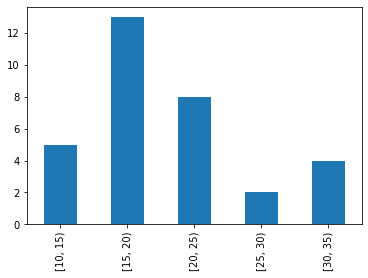

In [115]:
counts.plot(kind='bar')
plt.show()

In [116]:
n_i = counts
f_i = n_i/len(consumo)
N_i=np.cumsum(n_i)
F_i=N_i/len(consumo)
tabla_frecuencias = pd.DataFrame({'Frecuencia Absoluta': n_i, 'Frecuencia Relativa': f_i, 'Frec. Absoluta Acumulada': N_i, 'Frec. Relativa Acumulada': F_i})
tabla_frecuencias 

,Frecuencia Absoluta,Frecuencia Relativa,Frec. Absoluta Acumulada,Frec. Relativa Acumulada
"[10, 15)",5,0.15625,5,0.15625
"[15, 20)",13,0.40625,18,0.56250
"[20, 25)",8,0.25000,26,0.81250
"[25, 30)",2,0.06250,28,0.87500
"[30, 35)",4,0.12500,32,1.00000


Calculemos el percentil P65 de los datos agrupados:

In [117]:
N=len(consumo)
N

32

In [118]:
Ppos=0.65*N
Ppos

20.8

La clase encontrada es la tercera, (j=3) , por lo que el percentil se estima como:

$$P = L_j + \left( \frac{P_{\text{pos}} - F_{j-1}}{F_j-F{_{j-1}}} \right) (U_j-L_j),$$

con $j=3$



In [119]:
P65=10+(20.8-18)/(26-18)*(25-20)
P65

11.75

<h1>Un ejemplo desarrollado</h1>

Vamos a realizar un análisis de los datos contenidos en el fichero <strong>website_wata.csv</strong>, que debemos tener en la misma carpeta en la que estamos trabajando ahora.

In [120]:
# for data manipulation and analysis
import pandas as pd

# for high-performance multi-dimensional arrays and mathematical functions
import numpy as np

# for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

# for creating attractive and informative statistical graphics
import seaborn as sns

In [121]:
traffic=pd.read_csv('website_wata.csv')
traffic

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0
...,...,...,...,...,...,...,...
1995,1,2.724513,0.207187,Referral,1.324206,2,1.0
1996,3,0.392856,0.095559,Organic,3.824416,1,1.0
1997,4,9.899823,0.446622,Organic,1.288675,1,1.0
1998,3,0.393319,0.278340,Paid,5.037584,2,1.0


In [122]:
traffic.head()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0


In [123]:
traffic.tail()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
1995,1,2.724513,0.207187,Referral,1.324206,2,1.0
1996,3,0.392856,0.095559,Organic,3.824416,1,1.0
1997,4,9.899823,0.446622,Organic,1.288675,1,1.0
1998,3,0.393319,0.278340,Paid,5.037584,2,1.0
1999,3,0.882638,0.338026,Direct,5.186908,3,1.0


In [124]:
traffic.describe()

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.950500,3.022045,0.284767,4.027439,1.978500,0.982065
std,2.183903,3.104518,0.159781,2.887422,1.432852,0.065680
min,0.000000,0.003613,0.007868,0.068515,0.000000,0.343665
25%,3.000000,0.815828,0.161986,1.935037,1.000000,1.000000
50%,5.000000,1.993983,0.266375,3.315316,2.000000,1.000000
75%,6.000000,4.197569,0.388551,5.414627,3.000000,1.000000
max,14.000000,20.290516,0.844939,24.796182,9.000000,1.000000


In [125]:
traffic.shape

(2000, 7)

In [126]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rate       2000 non-null   float64
 3   Traffic Source    2000 non-null   object 
 4   Time on Page      2000 non-null   float64
 5   Previous Visits   2000 non-null   int64  
 6   Conversion Rate   2000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 109.5+ KB


In [127]:
# finding null values
traffic.isnull().sum()

Page Views          0
Session Duration    0
Bounce Rate         0
Traffic Source      0
Time on Page        0
Previous Visits     0
Conversion Rate     0
dtype: int64

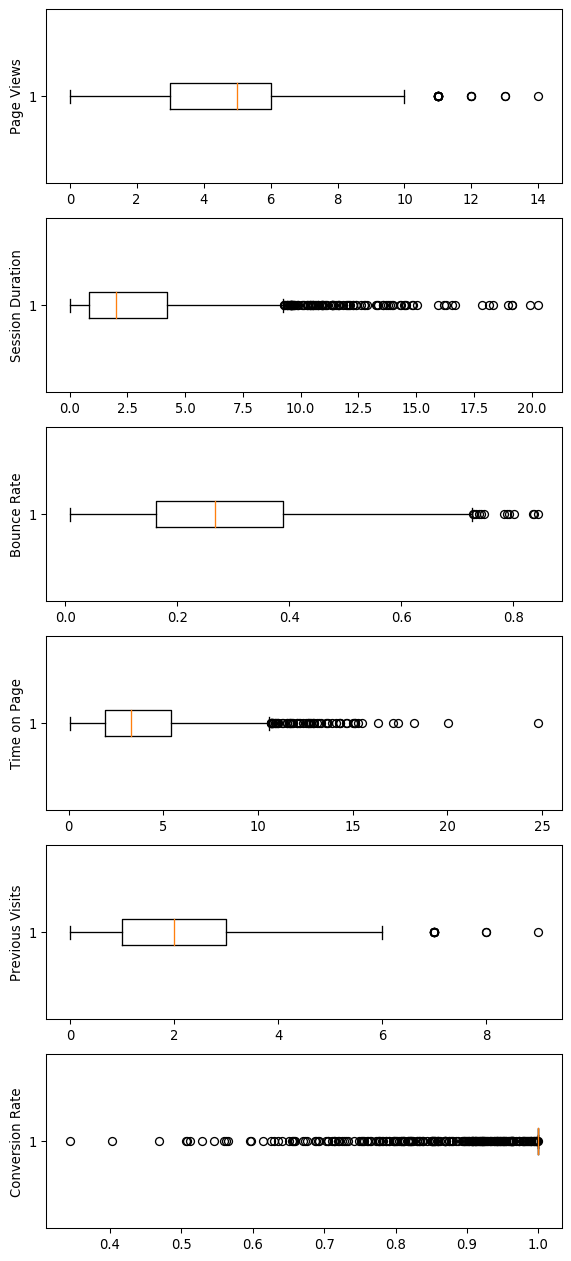

In [128]:
# creating new dataset without categorical column
traffic_num = traffic.drop('Traffic Source', axis=1)
# creating a box plot
fig, axs = plt.subplots(6,1,dpi=95, figsize=(7,17))
i = 0
for col in traffic_num.columns:
	axs[i].boxplot(traffic_num[col], vert=False)
	axs[i].set_ylabel(col)
	i+=1
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1afc8750>]],
      dtype=object)

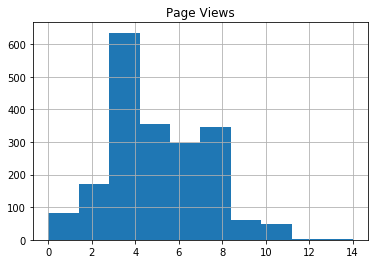

In [129]:
traffic.hist(column='Page Views')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a176350>]],
      dtype=object)

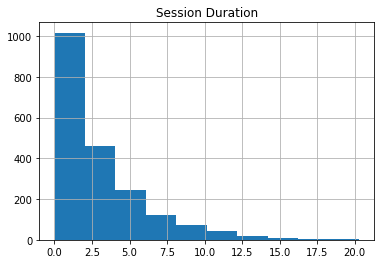

In [130]:
traffic.hist(column='Session Duration')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19acf350>]],
      dtype=object)

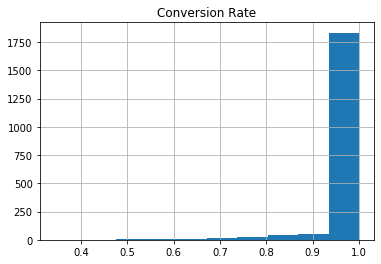

In [131]:
traffic.hist(column='Conversion Rate')

Calculemos los datos atípicos y eliminémoslos de la población. Esto debemos hacerlo para cada una de las variables observadas.

In [132]:
# Calculamos primero los cuartiles

q1, q3 = np.percentile(traffic['Page Views'], [25, 75])

print([q1,q3])

# calculate the interquartile range
iqr = q3 - q1

# calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# drop the outliers
traffic_clean = traffic[(traffic['Page Views'] >= lower_bound) & (traffic['Page Views'] <= upper_bound)]
traffic_clean

[3.0, 6.0]


,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0
...,...,...,...,...,...,...,...
1995,1,2.724513,0.207187,Referral,1.324206,2,1.0
1996,3,0.392856,0.095559,Organic,3.824416,1,1.0
1997,4,9.899823,0.446622,Organic,1.288675,1,1.0
1998,3,0.393319,0.278340,Paid,5.037584,2,1.0


In [133]:
print(traffic.shape)
print(traffic_clean.shape)

(2000, 7)
(1979, 7)


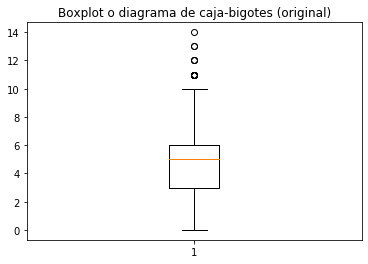

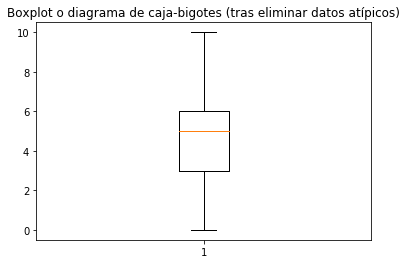

In [134]:
plt.boxplot(traffic["Page Views"]) 
plt.title('Boxplot o diagrama de caja-bigotes (original)') 
plt.show()

plt.boxplot(traffic_clean["Page Views"]) 
plt.title('Boxplot o diagrama de caja-bigotes (tras eliminar datos atípicos)') 
plt.show()


Lo mismo podemos hacer con el resto de variables observadas:

(2000, 7)
(1888, 7)


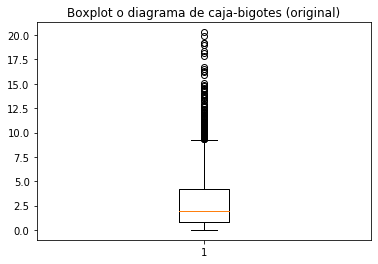

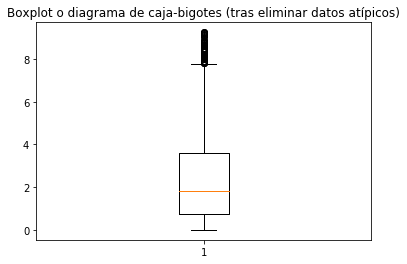

In [135]:
print(traffic.shape)

# COLUMN: Session Duration

# identify the quartiles
q1, q3 = np.percentile(traffic['Session Duration'], [25, 75])

# calculate the interquartile range
iqr = q3 - q1

# calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# drop the outliers
traffic_clean = traffic[(traffic['Session Duration'] >= lower_bound) & (traffic['Session Duration'] <= upper_bound)]


print(traffic_clean.shape)

plt.boxplot(traffic["Session Duration"]) 
plt.title('Boxplot o diagrama de caja-bigotes (original)') 
plt.show()


plt.boxplot(traffic_clean["Session Duration"]) 
plt.title('Boxplot o diagrama de caja-bigotes (tras eliminar datos atípicos)') 
plt.show()


Obsérvese que en el ejemplo anterior, aunque hemos calculado el diagrama de caja-bigotes de los datos típicos, en el nuevo diagrama aparecen aún datos atípicos. (Aunque son menos en cantidad que los que aparecían en el diagrama original).

(2000, 7)
(1987, 7)


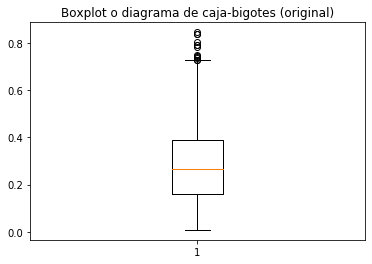

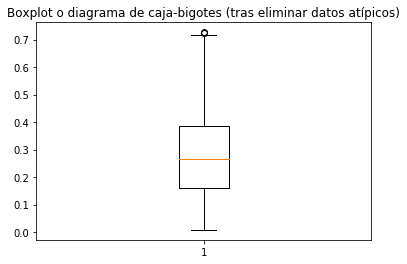

In [136]:
# COLUMN: Bounce Rate

# identify the quartiles
q1, q3 = np.percentile(traffic['Bounce Rate'], [25, 75])

# calculate the interquartile range
iqr = q3 - q1

# calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# drop the outliers
traffic_clean = traffic[(traffic['Bounce Rate'] >= lower_bound) & (traffic['Bounce Rate'] <= upper_bound)]


print(traffic.shape)
print(traffic_clean.shape)

plt.boxplot(traffic["Bounce Rate"]) 
plt.title('Boxplot o diagrama de caja-bigotes (original)') 
plt.show()


plt.boxplot(traffic_clean["Bounce Rate"]) 
plt.title('Boxplot o diagrama de caja-bigotes (tras eliminar datos atípicos)') 
plt.show()

(2000, 7)
(1936, 7)


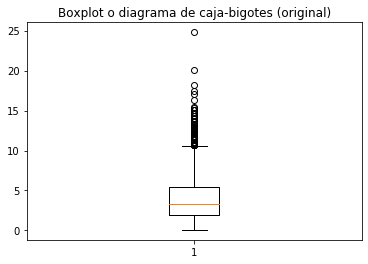

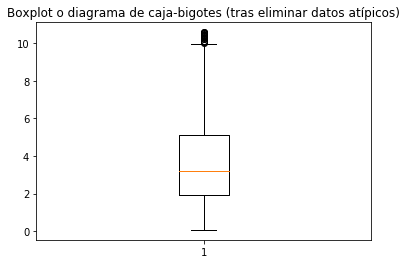

In [137]:
# COLUMN: Time on Page

# identify the quartiles
q1, q3 = np.percentile(traffic['Time on Page'], [25, 75])

# calculate the interquartile range
iqr = q3 - q1

# calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# drop the outliers
traffic_clean = traffic[(traffic['Time on Page'] >= lower_bound) & (traffic['Time on Page'] <= upper_bound)]

print(traffic.shape)
print(traffic_clean.shape)

plt.boxplot(traffic["Time on Page"]) 
plt.title('Boxplot o diagrama de caja-bigotes (original)') 
plt.show()


plt.boxplot(traffic_clean["Time on Page"]) 
plt.title('Boxplot o diagrama de caja-bigotes (tras eliminar datos atípicos)') 
plt.show()

(2000, 7)
(1987, 7)


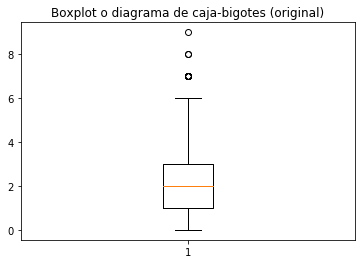

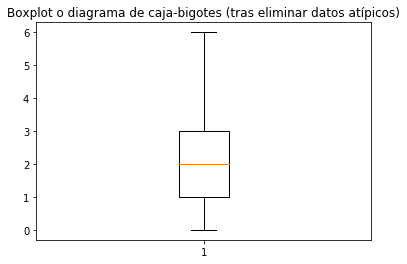

In [138]:
# COLUMN: Previous Visits

# identify the quartiles
q1, q3 = np.percentile(traffic['Previous Visits'], [25, 75])

# calculate the interquartile range
iqr = q3 - q1

# calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# drop the outliers
traffic_clean = traffic[(traffic['Previous Visits'] >= lower_bound) & (traffic['Previous Visits'] <= upper_bound)]


print(traffic.shape)
print(traffic_clean.shape)

plt.boxplot(traffic["Previous Visits"]) 
plt.title('Boxplot o diagrama de caja-bigotes (original)') 
plt.show()


plt.boxplot(traffic_clean["Previous Visits"]) 
plt.title('Boxplot o diagrama de caja-bigotes (tras eliminar datos atípicos)') 
plt.show()

(2000, 7)
(1773, 7)


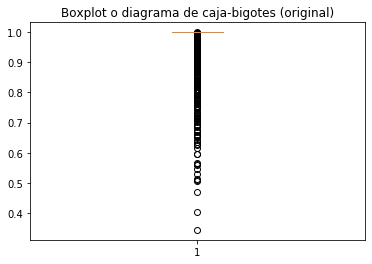

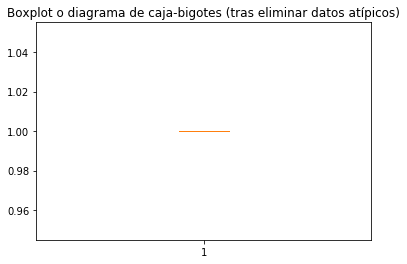

In [139]:
# COLUMN: Conversion Rate

# identify the quartiles
q1, q3 = np.percentile(traffic['Conversion Rate'], [25, 75])

# calculate the interquartile range
iqr = q3 - q1

# calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# drop the outliers
traffic_clean = traffic[(traffic['Conversion Rate'] >= lower_bound) & (traffic['Conversion Rate'] <= upper_bound)]



print(traffic.shape)
print(traffic_clean.shape)

plt.boxplot(traffic["Conversion Rate"]) 
plt.title('Boxplot o diagrama de caja-bigotes (original)') 
plt.show()


plt.boxplot(traffic_clean["Conversion Rate"]) 
plt.title('Boxplot o diagrama de caja-bigotes (tras eliminar datos atípicos)') 
plt.show()